# Problem description

#### How to reduce time needed for possible Naive Bayes Classifier simulation for theorethical problems?

# Import dependencies

In [14]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import LabelEncoder

# Data Import

Copied data from slide into LibreOffice Calc, saved as CSV, then loaded into pandas

In [15]:
df = pd.read_csv('../data/tax_evasion.csv', index_col='Tid')

In [16]:
df.head(3)

,Refund,Marital Status,Taxable Income,Evasion
Tid,,,,
1,Yes,Single,125K,No
2,No,Married,100K,No
3,No,Single,70K,No


Data can also be manually loaded into a DataFrame during exams

# Preprocessing

## Label Encoding

In [17]:
# df['Refund'] = df['Refund'].apply(lambda x: 1 if x == 'Yes' else 0)

# marital_encoder = LabelEncoder()
# df['Marital Status'] = marital_encoder.fit_transform(df['Marital Status'])

## Extracting continuous features

In [18]:
df['Taxable Income'] = df['Taxable Income'].apply(lambda x: x.removesuffix('K')).astype(int)

## Continuous features' mean and standard variation

In [34]:
taxable_df = df[['Taxable Income', 'Evasion']].groupby('Evasion').agg([np.mean, np.var])
taxable_df

Taxable Income        
                  mean     var
Evasion                       
No               110.0  2975.0
Yes               90.0    25.0

# Extracting categorical features' probabilities

In [65]:
refund_df = df.drop('Taxable Income', axis=1).groupby(['Evasion', 'Refund']).agg(['count']) / df.groupby('Evasion').agg(['count'])
refund_df.dropna(axis=1, inplace=True)

In [29]:
marital_df = df.drop('Taxable Income', axis=1).groupby(['Evasion', 'Marital Status']).agg(['count']) / df.groupby('Evasion').agg(['count'])
marital_df.dropna(axis=1, inplace=True)

In [67]:
refund_df

Marital Status
                        count
Evasion Refund               
No      No           0.571429
        Yes          0.428571
Yes     No           1.000000

In [32]:
marital_df

Refund
                           count
Evasion Marital Status          
No      Divorced        0.142857
        Married         0.571429
        Single          0.285714
Yes     Divorced        0.333333
        Single          0.666667

In [36]:
label_prob_df = df['Evasion'].value_counts() / len(df)
label_prob_df

No     0.7
Yes    0.3
Name: Evasion, dtype: float64

# Probability of tax evasion given taxable income

In [22]:
def calculate_prob(income, mean, var):
    return 1 / np.sqrt(2 * np.pi * var) * np.exp(- (income - mean) ** 2 / (2 * var))

# Example

In [44]:
query = {
    'Refund': 'Yes',
    'Marital Status': 'Single',
    'Taxable Income': 80
}

#### If the value is not in a df, set prob to 0

In [68]:
label_prob_df['Yes'] * marital_df.loc['Yes', 'Single'][0] * 0 * calculate_prob(query['Taxable Income'], taxable_df.loc['Yes'][0], taxable_df.loc['Yes'][1])

0.0

In [59]:
label_prob_df['No'] * marital_df.loc['No', 'Single'][0] * refund_df.loc['No', 'Yes'][0] * calculate_prob(query['Taxable Income'], taxable_df.loc['No'][0], taxable_df.loc['No'][1])

0.000538924824357502

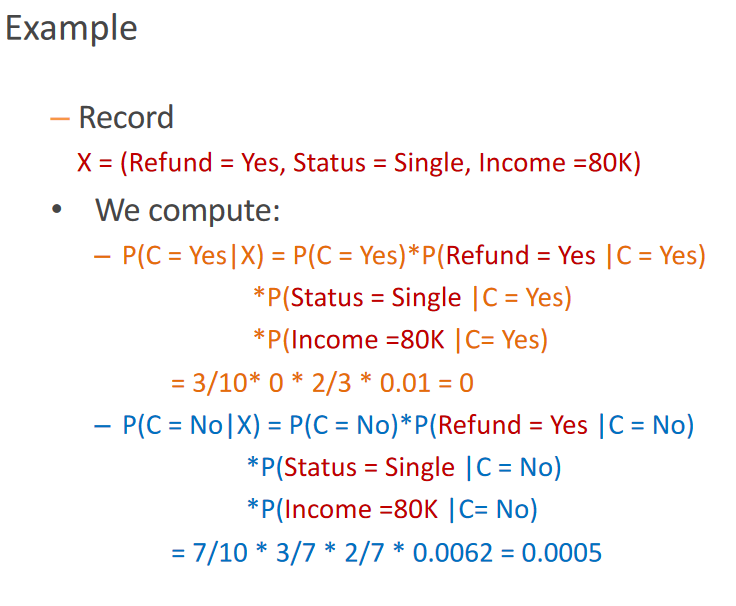